<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [4]:
target = df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [6]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [7]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [9]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [13]:
model.score(inputs_n,target)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [14]:
model.predict([[2,1,0]])

array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [15]:
model.predict([[2,1,1]])

array([1], dtype=int64)

**Exercise: Build decision tree model to predict survival based on certain parameters**

<img src="titanic.jpg" height=200 width=400/>

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model

In [60]:
data = pd.read_csv("Exercise/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.drop("Ticket",axis=1,inplace=True)

In [64]:
data.drop("Cabin", axis=1, inplace=True)

In [65]:
data.drop("Name", axis=1, inplace=True)

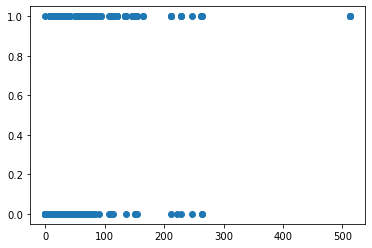

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data.Fare,data.Survived)
plt.show()

#### Fare columns has nothing to do with results.

In [67]:
data.drop("Fare", axis=1, inplace=True)

In [68]:
data_new = pd.get_dummies(data,columns=["Embarked"])

In [69]:
data_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,0,0,1
1,2,1,1,0,38.0,1,0,1,0,0
2,3,1,3,0,26.0,0,0,0,0,1
3,4,1,1,0,35.0,1,0,0,0,1
4,5,0,3,1,35.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,0,0,1
887,888,1,1,0,19.0,0,0,0,0,1
888,889,0,3,0,NaN,1,2,0,0,1
889,890,1,1,1,26.0,0,0,1,0,0


In [70]:
data_new.Age.isnull().sum()

177

In [74]:
data_new = data_new.dropna()

In [75]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Embarked_C   714 non-null    uint8  
 8   Embarked_Q   714 non-null    uint8  
 9   Embarked_S   714 non-null    uint8  
dtypes: float64(1), int32(1), int64(5), uint8(3)
memory usage: 43.9 KB


In [91]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(ccp_alpha=0.014)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = data_new.drop("Survived", axis=1)
y = data_new.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014)

In [93]:
dt.score(X_test, y_test)

0.8041958041958042

<AxesSubplot:>

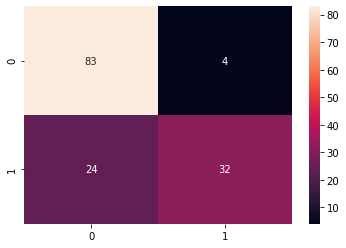

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = dt.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)